In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import xskillscore as xs
from scipy.stats import kendalltau

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "tos"
print(variable)
model = "IPSL-CM6A-LR"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)
name = "Surface temperature"

tos
IPSL-CM6A-LR
ssp585
Omon


In [5]:
nc = Dataset("Data/Raw/tos_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc")
unit = getattr(nc.variables[variable], "units")
unit

'degC'

## Interpolation

In [6]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

tos_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_201501-210012.nc
tos_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_210101-230012.nc


tos_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc


In [7]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/tos_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (362x332) to lonlat (360x180) grid, with source mask (65294)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 2 variables over 1032 timesteps.
cdo    remapdis: Processed 124029888 values from 1 variable over 1032 timesteps [12.34s 235MB].


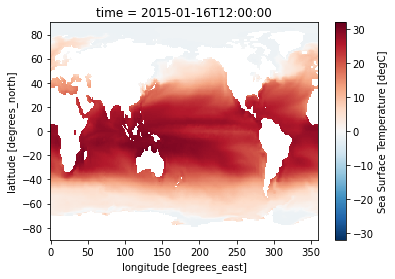

In [8]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [9]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/tos_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (362x332) to lonlat (360x180) grid, with source mask (65294)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 2 variables over 1980 timesteps.
cdo    remapdis: Processed 237964320 values from 1 variable over 1980 timesteps [23.70s 246MB].


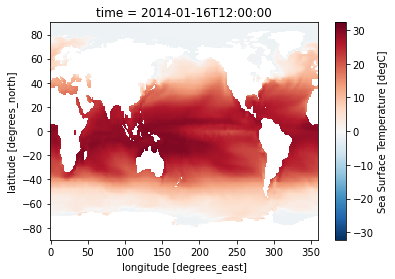

In [10]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

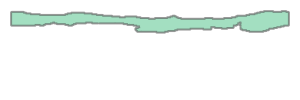

In [6]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [7]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [13]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    tos      (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:29 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [14]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    tos          (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:29 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [15]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

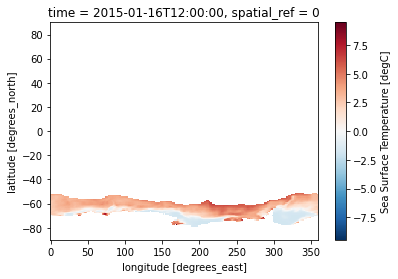

In [16]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [17]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [8]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time=slice('1995-01', '2014-12'))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 240, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    tos      (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:53 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [9]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 240, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    tos          (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:53 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [10]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

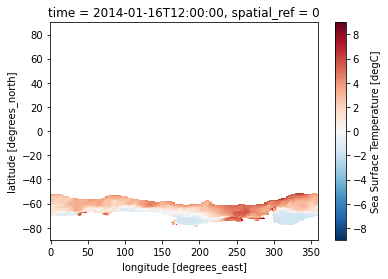

In [11]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [12]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

### historical

In [6]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    tos          (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:53 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [7]:
#historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical.drop_vars("spatial_ref")
historical_cropped = historical_cropped + 273.15
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:53 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:14Z
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [8]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

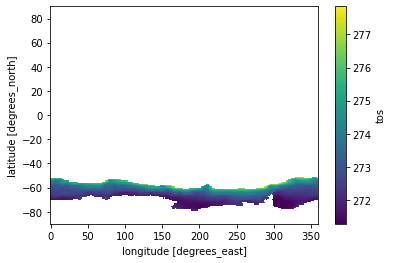

In [9]:
historical_mean[variable].plot()

In [10]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [11]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [12]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [13]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [14]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [15]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [16]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    tos          (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:29 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [17]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped = new_cropped + 273.15
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 14:55:29 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [18]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

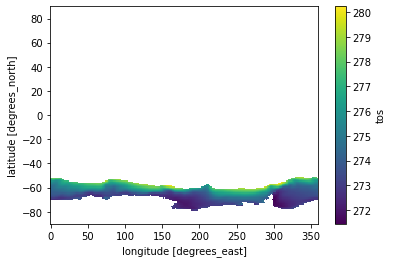

In [19]:
new_mean[variable].plot()

In [20]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [21]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [22]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [23]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [24]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [25]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [26]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [77]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

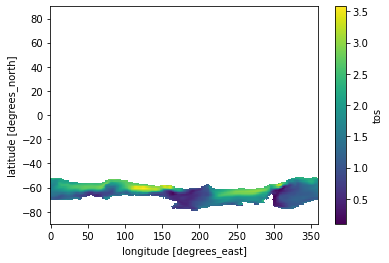

In [78]:
difference = new - historical
difference[variable].plot()
difference

In [79]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

PermissionError: [Errno 13] Permission denied: b'/media/jasmine/Album/Project/Data/tos_IPSL-CM6A-LR_ssp585_absolute.nc'

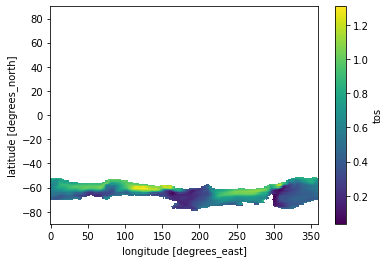

In [80]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [87]:
np.nanmax(percentage[variable].values)

1.3073106

In [82]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

PermissionError: [Errno 13] Permission denied: b'/media/jasmine/Album/Project/Data/tos_IPSL-CM6A-LR_ssp585_percentage.nc'

In [88]:
np.nanmax(xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))[variable].values)

1.3073106

#### Summer

In [32]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

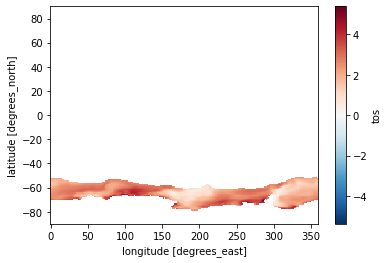

In [33]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [34]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

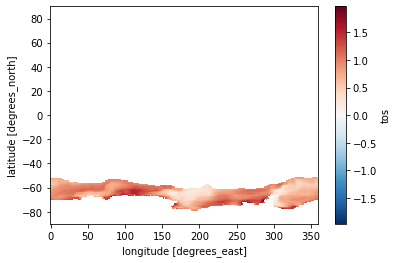

In [35]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [36]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [37]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

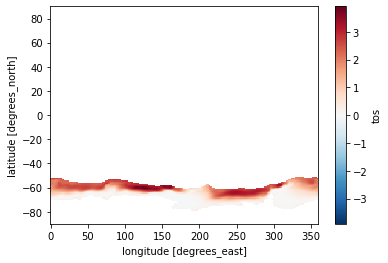

In [38]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [39]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

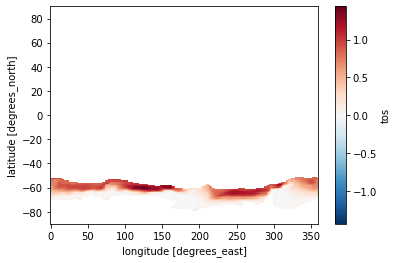

In [40]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [41]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Summary values

In [42]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 0.5809778571128845% 1.5890426635742188
Median change = 0.5319821834564209% 1.4484405517578125
Max inc = 1.3073105812072754% 3.577880859375
Max dec = 0.03598511591553688% 0.09771728515625


In [43]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

#### Season

In [44]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [45]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [46]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [47]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Zonal Absolute/Percentage Change

In [48]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [49]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

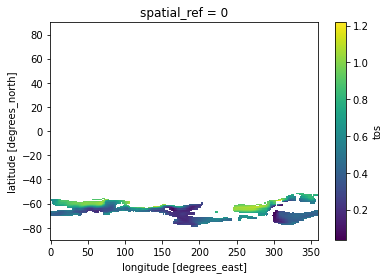

In [50]:
inc_area[variable].plot()

In [51]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [52]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

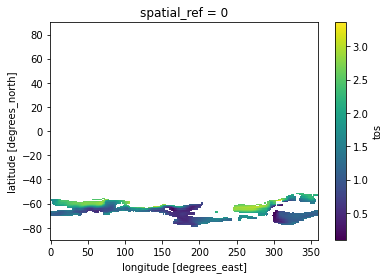

In [53]:
ab_inc_area[variable].plot()

In [54]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [55]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = 0.5366368889808655% 1.4664074182510376
 Max inc = 1.2168270349502563% 3.355194091796875
 Max dec = 0.03598511591553688% 0.09771728515625



In [56]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

#### Decreasing

In [57]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

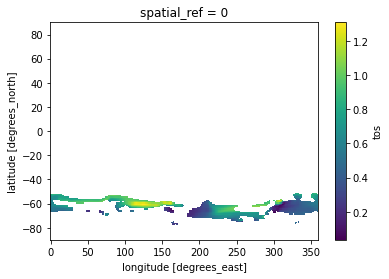

In [58]:
dec_area[variable].plot()

In [59]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [60]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    tos          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

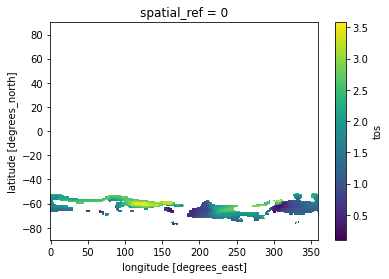

In [61]:
ab_dec_area[variable].plot()

In [62]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [63]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = 0.6452992558479309% 1.766758918762207
 Max inc = 1.3073105812072754% 3.577880859375
 Max dec = 0.03598511591553688% 0.09771728515625



In [64]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [65]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [66]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

277.83917 271.29074


In [67]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

280.2302 271.4389


In [68]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

280.2302 271.29074


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

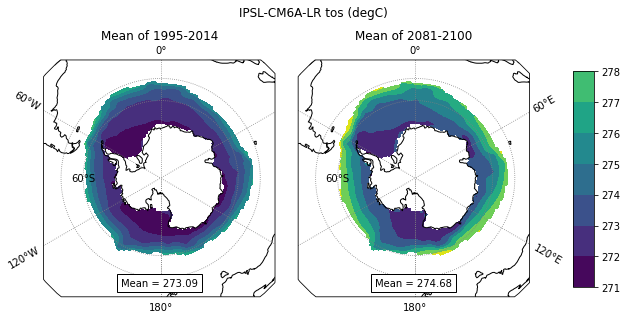

In [69]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2f}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2f}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [90]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tos      (lat, lon) float32 ...

In [89]:
np.nanmax(nc[variable].values)

1.3073106

In [100]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(label)
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

0.982041996717453
0.982041996717453 nan
1.3073106 0.035985116


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: Mean of empty slice


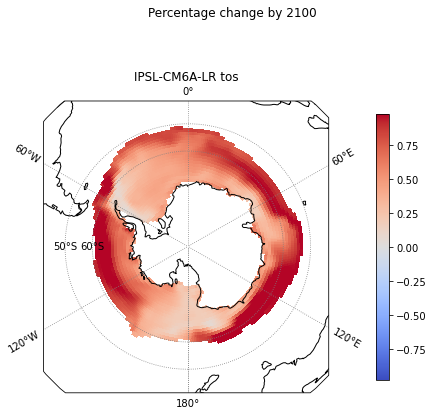

In [99]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Correlation with epc100

### Whole


In [128]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
exp_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [129]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.29293637)
Coordinates:
    depth    float64 100.0

In [130]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(6.87493467e-108)

In [104]:
export = 52.311659605820594

In [105]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

-0.2106473652213942 8.170853421404307e-120


In [106]:
data = {'Percentage': [median], 
        'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Kendall': [cor_ken], 
        'p_value_k': [cor_ken_p],
        'Variable': name,
        'Model': model,
        'Export': [export]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export
0,0.5319821834564209,-0.2929363672180181,6.874934674214554e-108,-0.210647,8.170853e-120,Surface temperature,IPSL-CM6A-LR,52.31166


In [107]:
df.to_csv("csv/Whole.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [108]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_percentage_inc.nc".format(model), decode_coords="all")

In [109]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.3273079)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [110]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(1.6086337e-85)

In [111]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

-0.30032914381139064 1.4299186883615466e-151


#### Dec

In [112]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/epc100_{}_percentage_dec.nc".format(model), decode_coords="all")

In [113]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.00078154)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [114]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(0.96606381)

In [115]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.01765347750127698 0.14950328573739596


In [116]:
data = {'Percentage': [inc_median, dec_median],
        'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Kendall': [cor_ken_inc, cor_ken_dec], 
        'p_value_k': [cor_ken_p_inc, cor_ken_p_dec],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone
0,0.47619208693504333,-0.32730789653187853,1.6086337034441747e-85,-0.300329,1.429919e-151,Surface temperature,IPSL-CM6A-LR,inc
1,0.6462888121604919,0.0007815403744931346,0.9660638141437995,0.017653,1.495033e-01,Surface temperature,IPSL-CM6A-LR,dec


In [117]:
df.to_csv("csv/Zone.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [118]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [119]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.03586993)
Coordinates:
    depth    float64 100.0

In [120]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.00821262)

In [121]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.006557283812969219 0.006557283812969219


#### Winter

In [122]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [123]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.45374795)
Coordinates:
    depth    float64 100.0

In [124]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(5.10273612e-274)

In [125]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

-0.4379879387576053 0.0


In [126]:
data = {'Percentage_summer': [median_summer, median_winter],
        'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Kendall': [cor_ken_summer, cor_ken_winter], 
        'p_value_k': [cor_ken_p_summer, cor_ken_p_winter],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

,Percentage_summer,Correlation_summer,p-value_summer,Kendall,p_value_k,Variable,Model,Season
0,0.8652034997940063,-0.03586993149364355,0.008212624108765165,0.006557,0.468762,Surface temperature,IPSL-CM6A-LR,summer
1,0.3129996061325073,-0.4537479480542347,5.102736119867566e-274,-0.437988,0.000000,Surface temperature,IPSL-CM6A-LR,winter


In [127]:
df.to_csv("csv/Season.csv", mode = "a", index = False, header=False)